## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import linalg
import math

## Read Data

In [2]:
data = np.loadtxt(open("iris.csv", "rb"), delimiter=",", skiprows=1, usecols=range(0,4))
data.shape

(150, 4)

# Cluster Data

In [3]:
miu_1 = data[np.random.randint(0,len(data))]
miu_1

array([5.8, 2.7, 5.1, 1.9])

In [4]:
miu_2 = data[np.random.randint(0,len(data))]
miu_2

array([5.8, 2.7, 5.1, 1.9])

In [5]:
miu_3 = data[np.random.randint(0,len(data))]
miu_3

array([6.8, 3. , 5.5, 2.1])

In [6]:
miu_s = np.concatenate(([miu_1],[miu_2],[miu_3]), axis=0)
miu_s

array([[5.8, 2.7, 5.1, 1.9],
       [5.8, 2.7, 5.1, 1.9],
       [6.8, 3. , 5.5, 2.1]])

In [7]:
r_n_k = np.zeros((len(data),3))  #three zeroes places for each miu in the current n
r_n_k.shape

(150, 3)

In [8]:
output = np.zeros((8,3))
output

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [9]:
q = 1.5
#for q in frange(1.5, 5.5, 0.5):
for i in range(8):
    miu_1 = data[np.random.randint(0,len(data))]
    miu_2 = data[np.random.randint(0,len(data))]
    miu_3 = data[np.random.randint(0,len(data))]
    miu_s = np.concatenate(([miu_1],[miu_2],[miu_3]), axis=0) #initialize three random Mius
    
    halt_counter = 0 #initialize halt counter  (@1000)
    convergence = False #initialize halt condition (if True)
    r_n_k = np.zeros((len(data),3))#initialize membership matrix of data for all clusters
    
    #compute membership and update Mius
    while(halt_counter < 1000 and (not convergence)):
        #compute r_n_k
        for data_index, data_point in enumerate(data):
            for k in range(3):
                difference_1 = data_point - miu_s[k]
                norm_difference_1 = linalg.norm(difference_1)
                norm_difference_1 *= norm_difference_1 #squaring the numerator
                denominator = 0
                for m in range(3):
                    difference = data_point - miu_s[m] #x_n - miu_m
                    norm_difference = linalg.norm(difference) #||result||
                    norm_difference *= norm_difference #(norm)^2
                    division_result = norm_difference_1/norm_difference
                    denominator += pow(division_result,(1.0/(q-1.0)))
                r_n_k[data_index][k] = 1/denominator
                if(math.isnan(r_n_k[data_index][k])):
                    r_n_k[data_index][k] = 1


        #update miu_k: for each r calculated for a miu in each data point (score of each miu'k' in a data point 'n')
        convergence = True #if the old value is the same as the new value then it will remain the same (True)
        for k in range(3):
            numerator = 0
            denominator = 0
            for data_index,data_point in enumerate(data):
                r_n_k_q = pow(r_n_k[data_index][k],q)
                numerator += (r_n_k_q * data_point)
                denominator += r_n_k_q
            miu_k = numerator/denominator
            if (not np.array_equal(miu_s[k],miu_k)):
                miu_s[k] = miu_k
                convergence = False
        halt_counter += 1
    q += 0.5
    
    
    #compute ocurrences of each miu for data points:
    for index,r_n in enumerate(r_n_k):
        #index_max_cluster = np.argmax(r_n)
        #if a flower clustered in more than one cluster (same max value in 2 or 3 clusters)
        indices_max_cluster = np.argwhere(r_n == np.amax(r_n)) #return indices of the max value
        indices_max_cluster = indices_max_cluster.reshape(1,-1)
        indices_max_cluster = indices_max_cluster[0]
        if(len(indices_max_cluster) <= 1):
            output[i][indices_max_cluster] += 1
        else: #if one flower data is clustered (has same max value) in more than one cluster, then add it to the cluster of more flowers
            index_max_occ = indices_max_cluster[0]
            for tempindex in indices_max_cluster:
                if(output[i][index_max_occ] < output[i][tempindex]):
                    index_max_occ = tempindex
            output[i][index_max_occ] += 1
            
        #if(i == 1):
           # print(output)
    #print(r_n_k[len(r_n_k)-2])
output

<ipython-input-9-43268b2272ee>:26: RuntimeWarning: divide by zero encountered in double_scalars
  division_result = norm_difference_1/norm_difference
<ipython-input-9-43268b2272ee>:26: RuntimeWarning: invalid value encountered in double_scalars
  division_result = norm_difference_1/norm_difference


array([[26., 28., 96.],
       [60., 50., 40.],
       [50., 59., 41.],
       [41., 59., 50.],
       [50., 58., 42.],
       [42., 50., 58.],
       [43., 57., 50.],
       [50., 57., 43.]])

# Plot Figure

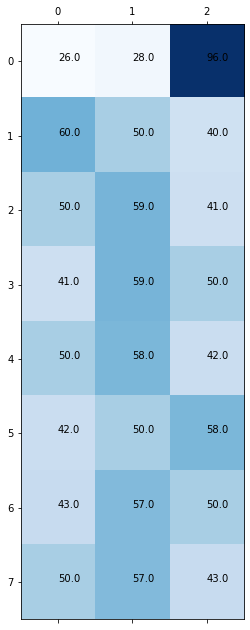

In [10]:
plt.rc('figure', figsize=[20,10])
plt.matshow(output,cmap='Blues')
for i in range(0,output.shape[0]):
    for j in range(0,output.shape[1]):
        plt.annotate(output[i,j],(j,i))
plt.savefig('Counts.jpg', bbox_inches="tight")

## Thank You :D